<a href="https://colab.research.google.com/github/gnana70/Machine-learning-projects/blob/master/Custom_YOLO_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cloning the darknet as orginal YOLO is written in darknet library

In [1]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 13486 (delta 2), reused 1 (delta 0), pack-reused 13478
Receiving objects: 100% (13486/13486), 12.07 MiB | 17.54 MiB/s, done.
Resolving deltas: 100% (9208/9208), done.


In [2]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [3]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


##Ignore any errors

In [4]:
# make darknet (build)
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:910:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1391:14: warning: unused variable ‘buff’ [-Wunused-variable]
         char buff[100];
              ^~~~
./src/image_opencv.cpp:1367:9: warning: unused variable ‘it_tb_res’ [-W

## Mounting Drive to import the weights as direct download takes more time

In [5]:
# get yolov3 pretrained coco dataset weights
# !wget https://pjreddie.com/media/files/yolov3.weights
import shutil

shutil.copy('/content/drive/My Drive/yolov3.weights','/content/darknet')


'/content/darknet/yolov3.weights'

In [0]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [0]:
# run darknet detection
!./darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 

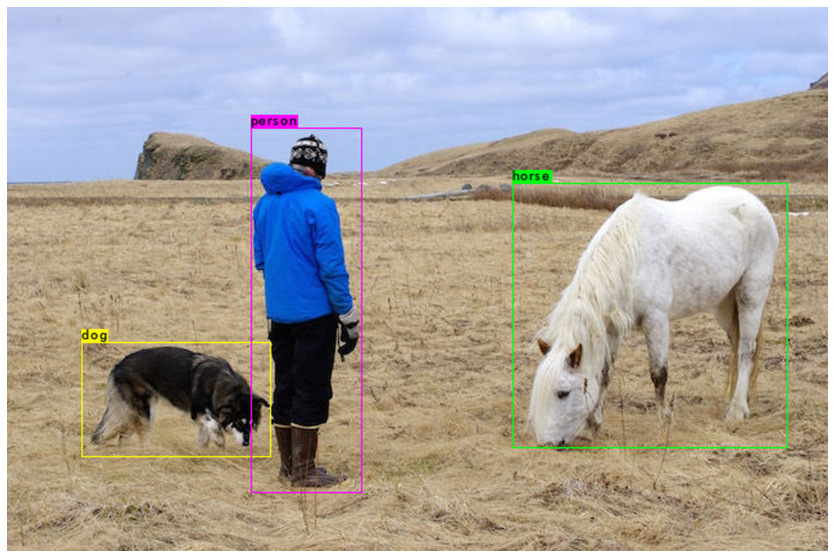

In [0]:
# show image using our helper function
imShow('predictions.jpg')

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 

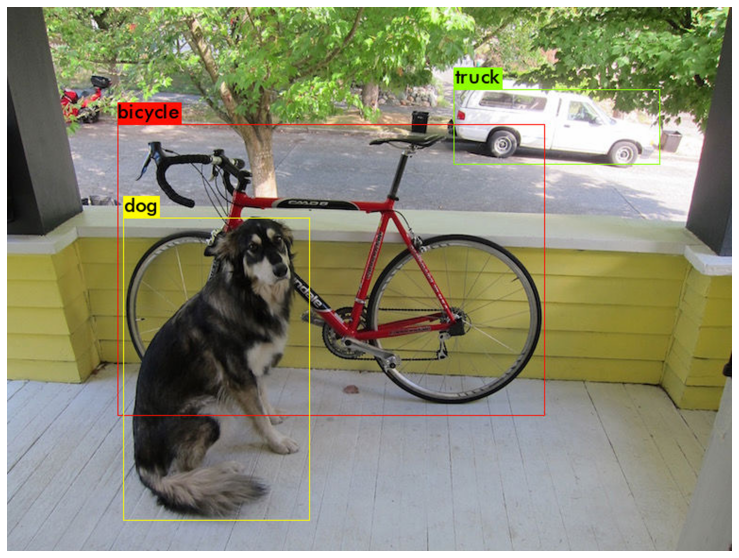

In [0]:
# look we can run another detection!
!./darknet detect cfg/yolov3.cfg yolov3.weights data/dog.jpg
imShow('predictions.jpg')

## Testing based on user files

In [0]:
# upload an image to root directory (I uploaded an image called street.jpg, you can upload anything)
%cd ..
upload()

## you can use the below command to run !./darknet detect "path to config" "path to weights" "path to image"

In [0]:
# make sure you are in the darknet folder to run the detections command!
%cd darknet
!./darknet detect cfg/yolov3.cfg yolov3.weights ../download.jpg
imShow('predictions.jpg')

## Custom model training start !!!

In [0]:
# mount the google drive only if it is not mounted in your colab file system
%cd ..
from google.colab import drive
drive.mount('/content/drive')

/content
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/drive/My\ Drive/ /mydrive
!ls /mydrive

'Accenture exit files'
'Accumulators - Introduction.ppt'
'Actuators - Introduction.ppt'
'android app'
 Birthday
 Books
 certifications
'Colab Notebooks'
 Compressors.ppt
 dress
'effective python.pdf'
 FB_IMG_1522408836650.jpg
 Gnana_Prasath_Jan_2020.docx
 Gnana_Prasath_Jan_2020.pdf
'Gnana Prasath ML Engineer.docx'
'Gnana Prasath_ML Engineer_Hyderabad.pdf'
'Gnana prasath.pdf'
'HEMNATH D.gdoc'
'horses vs gangaroo'
'Hydraulic Valves - Introduction.ppt'
 IMG_1479.MOV
 IMG_20180429_122351.jpg
 IMG_20180429_123043.jpg
 IMG_20180429_123152.jpg
 IMG_20180429_123216.jpg
 IMG_20180429_123353.jpg
 IMG_20180429_123412.jpg
 IMG_20180429_123506.jpg
 IMG_20180429_123521.jpg
 IMG_20180429_123812.jpg
 IMG_20180429_123816.jpg
 IMG_20180429_123818.jpg
 IMG_20180429_123823.jpg
 IMG_20180429_123833.jpg
 IMG_20180429_123959.jpg
 IMG_20180429_124013.jpg
 IMG_20180429_124104.jpg
 IMG_20180429_124131.jpg
 IMG_20180429_124253.jpg
 IMG_20180429_124316.jpg
 IMG_20180429_124320.jpg
 IMG_20180429_124733.jpg
 IMG_20

# Ideally, we should have prepared the dataset using LabelImg and annoated all the images. Make sure that all the different classes are present under the same folder structure(obj as folder name to work in below code) and each image has correponding text file with annotation details. 

Finally we Zip the file and upload to our google drive for easily importing into colab

In [8]:
# this is where my zip is stored (I created a yolov3 folder where I will get my required files from)
!ls /mydrive/yolov3

backup		   mask.jpg    obj.data   obj.zip	      yolov3_custom.cfg
generate_train.py  nomask.jpg  obj.names  yolov3_custom2.cfg


In [0]:
# copy the .zip file into the root directory of cloud VM
!cp /mydrive/yolov3/obj.zip ../

In [10]:
# unzip the zip file and its contents should now be in /darknet/data/obj
!unzip ../obj.zip -d /content/darknet/data

Archive:  ../obj.zip
  inflating: /content/darknet/data/obj/00000000.jpg  
 extracting: /content/darknet/data/obj/00000000.txt  
  inflating: /content/darknet/data/obj/00000002.jpg  
 extracting: /content/darknet/data/obj/00000002.txt  
  inflating: /content/darknet/data/obj/00000004.jpg  
  inflating: /content/darknet/data/obj/00000004.txt  
  inflating: /content/darknet/data/obj/00000005.jpg  
  inflating: /content/darknet/data/obj/00000005.txt  
  inflating: /content/darknet/data/obj/00000006.jpg  
  inflating: /content/darknet/data/obj/00000006.txt  
  inflating: /content/darknet/data/obj/00000007.jpg  
  inflating: /content/darknet/data/obj/00000007.txt  
  inflating: /content/darknet/data/obj/00000008.jpg  
 extracting: /content/darknet/data/obj/00000008.txt  
  inflating: /content/darknet/data/obj/00000009.jpg  
 extracting: /content/darknet/data/obj/00000009.txt  
  inflating: /content/darknet/data/obj/00000010.jpg  
  inflating: /content/darknet/data/obj/00000010.txt  
  infla

We need to update the yolo config file as per our need. Below steps helps us in downloading the file.

Have to update
Yolo layer classes 
Yolo layer random from 1 to 0 (to save the memnory)
Convolutional layers filter above Yolo to (num of classes + 5 ) *3
max_batches = 4000 ( 2000 * number of classes)
steps=3200,3600   (80% of max_batches , 90% of max_batches)

In [0]:
# download cfg to google drive and change its name
!cp /content/darknet/cfg/yolov3.cfg /mydrive/yolov3/yolov3_custom2.cfg

In [0]:
# to download to local machine (change its name to yolov3_custom.cfg once you download)
download('/content/darknet/cfg/yolov3.cfg')

In [11]:
# upload the custom .cfg back to cloud VM from Google Drive
#!cp /mydrive/yolov3/yolov3_custom.cfg ./cfg

# upload the custom .cfg back to cloud VM from local machine (uncomment to use)
%cd /content/darknet/cfg
upload()
%cd .. 

/content/darknet/cfg


Saving yolov3_custom.cfg to yolov3_custom.cfg
saved file yolov3_custom.cfg
/content/darknet


obj.names contains the classes data and obj.data conatins test_train_split along with backup weight path 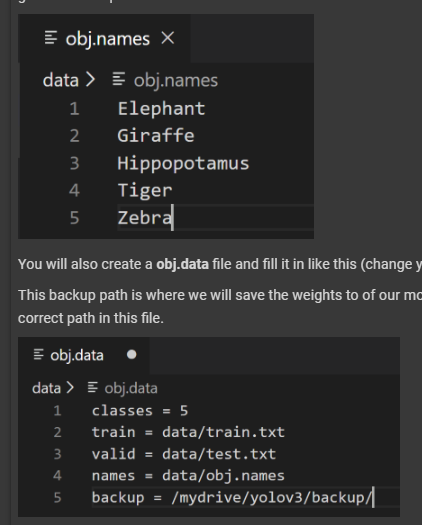

In [0]:
!touch /content/obj.names
!touch /content/obj.data

download('/content/obj.data')
download('/content/obj.names')



Edit the files and upload it back to the root folder

obj.data:
classes = 2
train = data/train.txt
valid = data/test.txt
names = data/obj.names
backup = /mydrive/yolov3/backup/

obj.names:
mask
no mask

In [0]:
# upload the obj.names and obj.data files to cloud VM from Google Drive
!cp /content/obj.names ./data
!cp /content/obj.data  ./data

# upload the obj.names and obj.data files to cloud VM from local machine (uncomment to use)
#%cd data
#upload()
#%cd .. 

In [13]:
! wget https://raw.githubusercontent.com/theAIGuysCode/YoloGenerateTrainingFile/master/generate_train.py

--2020-05-18 08:22:52--  https://raw.githubusercontent.com/theAIGuysCode/YoloGenerateTrainingFile/master/generate_train.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 381 [text/plain]
Saving to: ‘generate_train.py’

generate_train.py   100%[===================>]     381  --.-KB/s    in 0s      

2020-05-18 08:22:52 (13.3 MB/s) - ‘generate_train.py’ saved [381/381]



Below is the code on generate.py and it can be accessed in the url [link text](https://github.com/theAIGuysCode/YoloGenerateTrainingFile/blob/master/generate_train.py/)

import os

image_files = []
os.chdir(os.path.join("data", "obj"))
for filename in os.listdir(os.getcwd()):
    if filename.endswith(".jpg"):
        image_files.append("data/obj/" + filename)
os.chdir("..")
with open("train.txt", "w") as outfile:
    for image in image_files:
        outfile.write(image)
        outfile.write("\n")
    outfile.close()
os.chdir("..")

In [14]:
%cd /content/darknet
!python generate_train.py

/content/darknet


In [15]:
#make sure that train.txt is present
!ls data/

9k.tree     eagle.jpg	 imagenet.labels.list	   obj.data	     scream.jpg
coco9k.map  giraffe.jpg  imagenet.shortnames.list  obj.names	     train.txt
coco.names  goal.txt	 labels			   openimages.names  voc.names
dog.jpg     horses.jpg	 obj			   person.jpg


In [0]:
# upload pretrained convolutional layer weights
!wget http://pjreddie.com/media/files/darknet53.conv.74

--2020-05-18 04:03:10--  http://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://pjreddie.com/media/files/darknet53.conv.74 [following]
--2020-05-18 04:03:10--  https://pjreddie.com/media/files/darknet53.conv.74
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M   268KB/s    in 7m 30s  

2020-05-18 04:10:43 (352 KB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



## syntax to train the YOLO model,  !./darknet detector train "path to obj.data" "path to custom config" darknet53.conv.74 -dont_show

This code below helps use in making sure that Colab doesnt close. Run it in console, so it does the rest


function ClickConnect(){
console.log("Working"); 
document.querySelector("colab-toolbar-button#connect").click() 
}
setInterval(ClickConnect,60000)

In [0]:
# train your custom detector
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg darknet53.conv.74 -dont_show

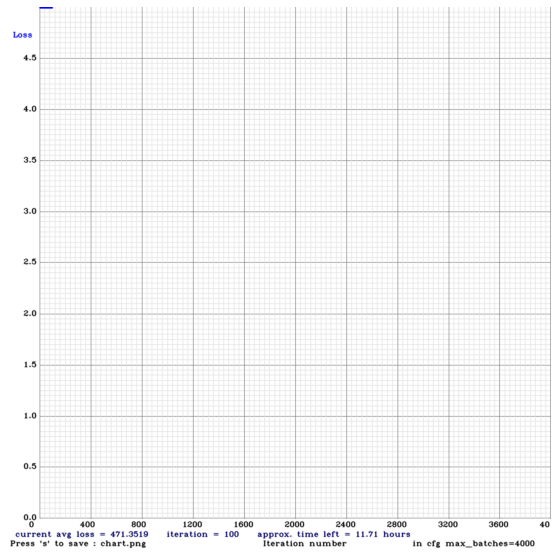

In [0]:
imShow('chart.png')

In [0]:
# to train the model from previous weights (un comment to run)
# !./darknet detector train data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3/backup/yolov3_custom_last.weights -dont_show

In [16]:
# need to set our custom cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3_custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3_custom.cfg
%cd ..

/content/darknet/cfg
/content/darknet


 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 

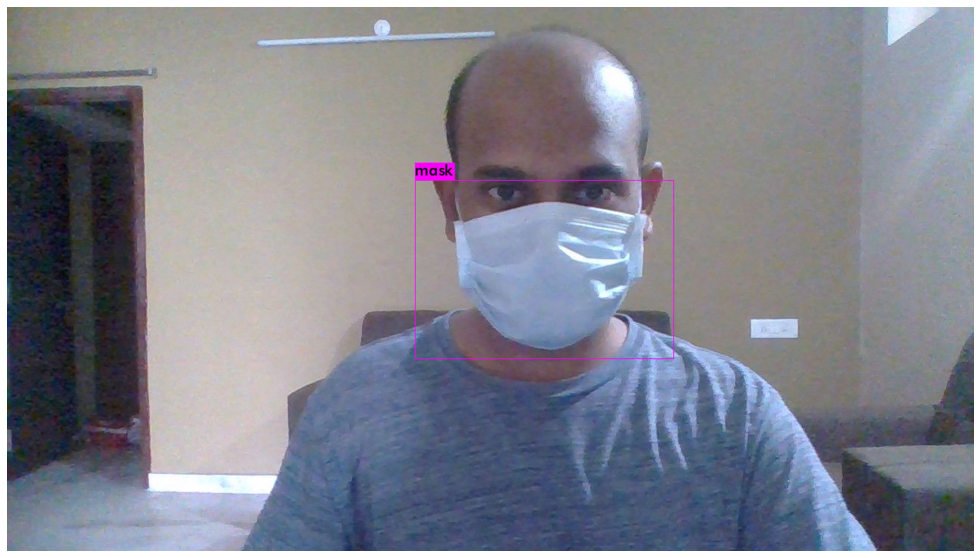

In [17]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3/backup/yolov3_custom_last.weights /mydrive/yolov3/mask.jpg -thresh 0.3
imShow('predictions.jpg')

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 370, cudnn_half = 0, GPU: Tesla K80 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 128 0.001 

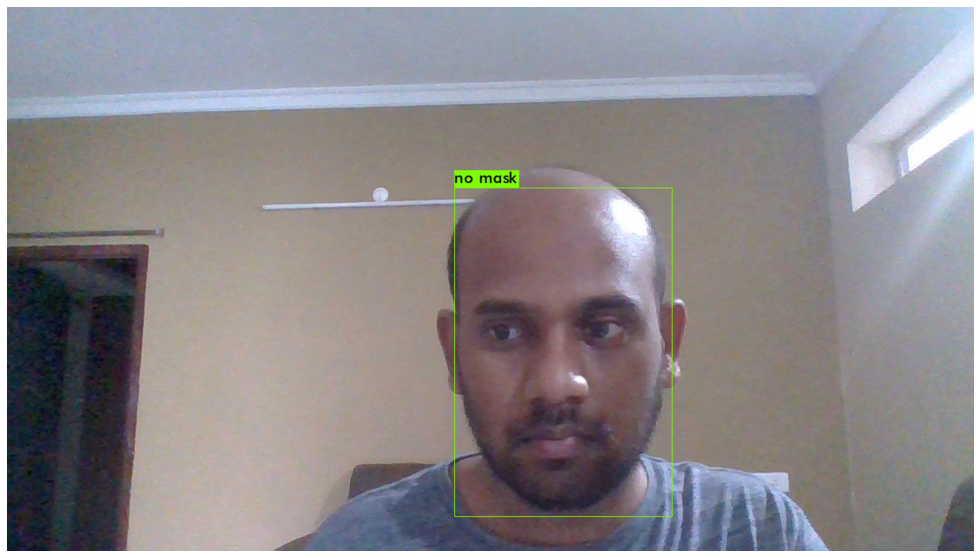

In [18]:
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3/backup/yolov3_custom_last.weights /mydrive/yolov3/nomask.jpg -thresh 0.3
imShow('predictions.jpg')

In [31]:
# for video detection
# !./darknet detector demo cfg/coco.data cfg/yolov3.cfg yolov3.weights -dont_show doggy.mp4 -i 0 -out_filename out.avi

!./darknet detector demo data/obj.data cfg/yolov3_custom.cfg /mydrive/yolov3/backup/yolov3_custom_last.weights -dont_show /content/youtube_videos.mp4 -i 0 -out_filename /content/output.avi

Streaming output truncated to the last 5000 lines.
FPS:12.8 	 AVG_FPS:12.6

 cvWriteFrame 
Objects:

mask: 75% 
mask: 59% 

FPS:12.8 	 AVG_FPS:12.6

 cvWriteFrame 
Objects:

mask: 76% 
mask: 61% 

FPS:12.7 	 AVG_FPS:12.6

 cvWriteFrame 
Objects:

mask: 81% 
mask: 79% 

FPS:12.7 	 AVG_FPS:12.6

 cvWriteFrame 
Objects:

mask: 81% 

FPS:12.7 	 AVG_FPS:12.6

 cvWriteFrame 
Objects:

mask: 83% 

FPS:12.8 	 AVG_FPS:12.6

 cvWriteFrame 
Objects:

mask: 81% 

FPS:12.8 	 AVG_FPS:12.6

 cvWriteFrame 
Objects:

mask: 81% 

FPS:12.7 	 AVG_FPS:12.6

 cvWriteFrame 
Objects:

mask: 79% 

FPS:12.7 	 AVG_FPS:12.6

 cvWriteFrame 
Objects:

mask: 68% 

FPS:12.6 	 AVG_FPS:12.7

 cvWriteFrame 
Objects:

mask: 66% 

FPS:12.6 	 AVG_FPS:12.7

 cvWriteFrame 
Objects:

mask: 59% 

FPS:12.5 	 AVG_FPS:12.7

 cvWriteFrame 
Objects:

mask: 54% 

FPS:12.6 	 AVG_FPS:12.7

 cvWriteFrame 
Objects:

mask: 52% 

FPS:12.6 	 AVG_FPS:12.7

 cvWriteFrame 
Objects:

mask: 59% 

FPS:12.6 	 AVG_FPS:12.7

 cvWriteFrame 
Objects: